In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
from citipy import citipy

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | lazaro cardenas
Processing Record 4 of Set 1 | barra patuca
Processing Record 5 of Set 1 | ust-ilimsk
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | smolenka
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | makakilo city
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | ulaanbaatar
Processing Record 20 of Set 1 | hermanus

Processing Record 38 of Set 4 | halifax
Processing Record 39 of Set 4 | tikapur
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | high level
Processing Record 43 of Set 4 | jinchang
Processing Record 44 of Set 4 | sirpur
Processing Record 45 of Set 4 | storm lake
Processing Record 46 of Set 4 | maryville
Processing Record 47 of Set 4 | sijunjung
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | nhulunbuy
Processing Record 2 of Set 5 | victor harbor
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | moura
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | henties bay
Processing Record 9 of Set 5 | mackay
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | divnogorsk
Processing 

Processing Record 33 of Set 8 | nakhodka
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | probolinggo
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | zirandaro
Processing Record 38 of Set 8 | shalinskoye
Processing Record 39 of Set 8 | palu
Processing Record 40 of Set 8 | itoman
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | hamilton
Processing Record 43 of Set 8 | ayan
Processing Record 44 of Set 8 | lyngseidet
Processing Record 45 of Set 8 | cartagena
Processing Record 46 of Set 8 | kushmurun
Processing Record 47 of Set 8 | barahona
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | walvis bay
Processing Record 50 of Set 8 | jaroslaw
Processing Record 1 of Set 9 | hermiston
Processing Record 2 of Set 9 | okhotsk
Processing Record 3 of Set 9 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 9 | kondinskoye
Processing Record 5 of Set 9 | maceio
Processing Record 6 of Set 9 |

Processing Record 21 of Set 12 | saint anthony
Processing Record 22 of Set 12 | gayny
Processing Record 23 of Set 12 | aktau
Processing Record 24 of Set 12 | pokhara
Processing Record 25 of Set 12 | boca do acre
Processing Record 26 of Set 12 | santiago de cuba
Processing Record 27 of Set 12 | tubruq
City not found. Skipping...
Processing Record 28 of Set 12 | dinar
Processing Record 29 of Set 12 | sao felix do xingu
Processing Record 30 of Set 12 | haimen
Processing Record 31 of Set 12 | nizhnyaya tavda
Processing Record 32 of Set 12 | weihai
Processing Record 33 of Set 12 | ola
Processing Record 34 of Set 12 | saint-michel-des-saints
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 of Set 12 | penzance
Processing Record 38 of Set 12 | iracoubo
Processing Record 39 of Set 12 | laguna
Processing Record 40 of Set 12 | neryungri
Processing Record 41 of Set 12 | sayat
Processing Record 42 of Set 12 | camacha
Processing Record 4

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.15,73,96,8.28,MV,2021-10-22 03:39:12
1,Hobart,-42.8794,147.3294,69.22,66,75,4.00,AU,2021-10-22 03:36:06
2,Lazaro Cardenas,17.9583,-102.2000,80.47,82,84,2.71,MX,2021-10-22 03:39:13
3,Barra Patuca,15.8000,-84.2833,78.94,87,99,6.69,HN,2021-10-22 03:39:14
4,Ust-Ilimsk,58.0006,102.6619,44.64,54,23,7.72,RU,2021-10-22 03:39:14
5,Port Alfred,-33.5906,26.8910,66.18,78,100,5.68,ZA,2021-10-22 03:39:15
6,Clyde River,70.4692,-68.5914,20.03,79,48,7.76,CA,2021-10-22 03:39:16
7,Sao Filipe,14.8961,-24.4956,80.06,70,0,2.17,CV,2021-10-22 03:39:16
8,Ilulissat,69.2167,-51.1000,28.42,74,75,6.91,GL,2021-10-22 03:39:17
9,Smolenka,52.1352,113.4974,33.87,64,4,0.00,RU,2021-10-22 03:39:18


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-10-22 03:39:12,-0.6000,73.0833,82.15,73,96,8.28
1,Hobart,AU,2021-10-22 03:36:06,-42.8794,147.3294,69.22,66,75,4.00
2,Lazaro Cardenas,MX,2021-10-22 03:39:13,17.9583,-102.2000,80.47,82,84,2.71
3,Barra Patuca,HN,2021-10-22 03:39:14,15.8000,-84.2833,78.94,87,99,6.69
4,Ust-Ilimsk,RU,2021-10-22 03:39:14,58.0006,102.6619,44.64,54,23,7.72
5,Port Alfred,ZA,2021-10-22 03:39:15,-33.5906,26.8910,66.18,78,100,5.68
6,Clyde River,CA,2021-10-22 03:39:16,70.4692,-68.5914,20.03,79,48,7.76
7,Sao Filipe,CV,2021-10-22 03:39:16,14.8961,-24.4956,80.06,70,0,2.17
8,Ilulissat,GL,2021-10-22 03:39:17,69.2167,-51.1000,28.42,74,75,6.91
9,Smolenka,RU,2021-10-22 03:39:18,52.1352,113.4974,33.87,64,4,0.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

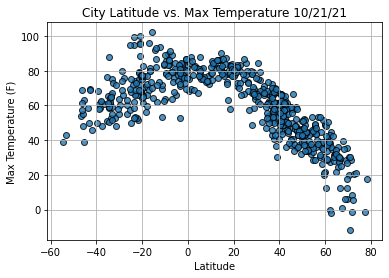

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

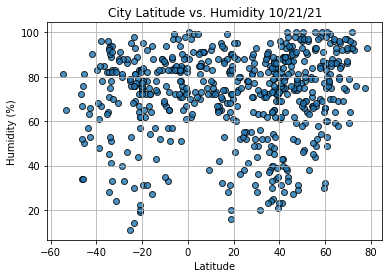

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

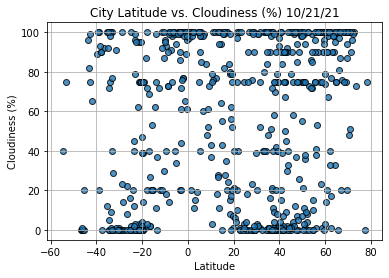

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

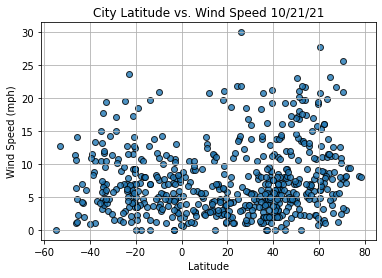

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()